<a href="https://colab.research.google.com/github/danielfrgs/2023_1-Analisis_Multivariado/blob/main/Tarea/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=300)
plt.rcParams["figure.figsize"] = (8,6)


<Figure size 3600x3000 with 0 Axes>

# Ejercicio 1

Para los datos correspondientes al rendimiento, millas por galón de combustible, de los automóviles provenientes de Japón, Norte América y Europd, encontrar en cada caso, las estadístricas: $x_*, x^*, M, F_L, F_U, b_L, b_U, \bar{x}$.

Primero  vamos a hacer la lectura de los datos utilizando la libreria `pandas`.

In [3]:
combustible = pd.read_csv('/content/drive/MyDrive/Universidad/Ciencia de Datos/7mo Semestre/2023_1-Analisis_Multivariado/Ejercicios/E1/carc B.txt', sep=" ",header=None)

In [4]:
combustible

,0,1
0,1,22
1,1,17
2,1,22
3,2,17
4,2,23
...,...,...
69,2,25
70,2,41
71,2,25
72,2,23


Aunque no tenemos un diccionario de datos que nos indique que categoria de la tabla corresponde a cada país vamos a suponer que 
- 1: Japón
- 2: America
- 3: Europa.

Vamos a Filtrar nuestro conjunto de datos y dividirlo en 3 conjuntos con el fin de obtener las estadisticas para cada región:

In [5]:
jap = combustible[combustible[0]==1][1].sort_values()
ame = combustible[combustible[0]==2][1].sort_values()
eur = combustible[combustible[0]==3][1].sort_values()

## Función

Vamos a crear una función que genere estas estadisticas de forma automatica, vamos a usar las funciones predefinidas en python, pero vamos a desarrollar cada valor siguiendo el hecho de que:


In [6]:
def est_box(df):
  # Luego vamos a obtener la mediana del conjunto
  M = df.median()

  # Para el calculo de los cuantiles necesitamos saber si
  # el conjunto de datos es par o impar.
  # Obtengamos la longitud del conjunto.
  n = len(df)

  if n%2 == 0:
      # Si el conjunto de datos es par no se toma la mediana
      c1 = df[:(n//2)]
      c2 = df[(n//2):]
  else:
      # Si el conjunto de datos es impar se incluye la mediana en ambas listas.
      c1 = df[:(n//2)+1]
      c2 = df[(n//2):]

  # Ahora obtenemos el promedio del conjunto
  x = df.mean()
  # Y obtenemsos las medianas de cada uno de los conjuntos separados
  fl = c1.median()
  fu = c2.median()
  # Segumos las formulas para obtener el resto de las funciones considerando la explicación
  # anterior.
  df_ = fu-fl
  bl = fl-1.5*df_
  bu = fu+1.5*df_

  # Primero vamos a obtener x^*, es decir el valor maximo:
  x_max = df[df<=bu].max()
  # Luego vamos a obtener x_*, es decir el valor minimo:
  x_min = df[df>=bl].min()

  # Finalmnete devolvemos los datos:

  print('Estadisticas:')
  print('---------------------')
  print(f' x_max: {x_max}\n x_min: {x_min}\n M: {M}\n F_L: {fl}\n F_U: {fu}\n bl: {bl}\n bu: {bu}\n mean: {x}')

### Japón


In [7]:
est_box(jap)

Estadisticas:
---------------------
 x_max: 30
 x_min: 12
 M: 19.0
 F_L: 16.5
 F_U: 22.0
 bl: 8.25
 bu: 30.25
 mean: 19.826923076923077


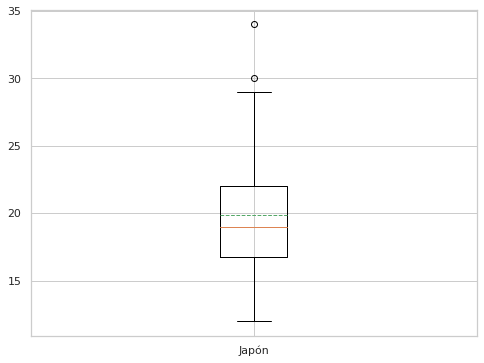

In [8]:
plt.boxplot(jap, vert=True, showmeans=True, meanline=True, labels=['Japón'])
plt.savefig("1-Japon.pdf", format="pdf", bbox_inches="tight")

## America

In [9]:
est_box(ame)

Estadisticas:
---------------------
 x_max: 28
 x_min: 14
 M: 23.0
 F_L: 19.0
 F_U: 25.0
 bl: 10.0
 bu: 34.0
 mean: 23.545454545454547


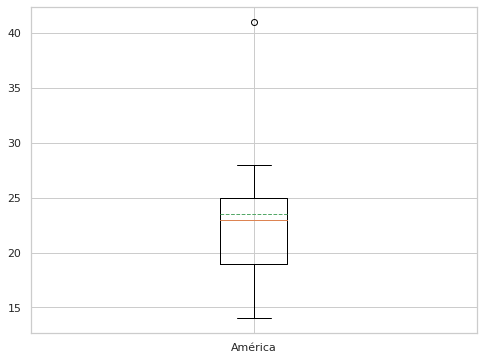

In [10]:
plt.boxplot(ame, vert=True, showmeans=True, meanline=True, labels=['América'])
plt.savefig("1-Ame.pdf", format="pdf", bbox_inches="tight")

## Europa

In [11]:
est_box(eur)

Estadisticas:
---------------------
 x_max: 35
 x_min: 18
 M: 25.0
 F_L: 22.0
 F_U: 30.5
 bl: 9.25
 bu: 43.25
 mean: 26.181818181818183


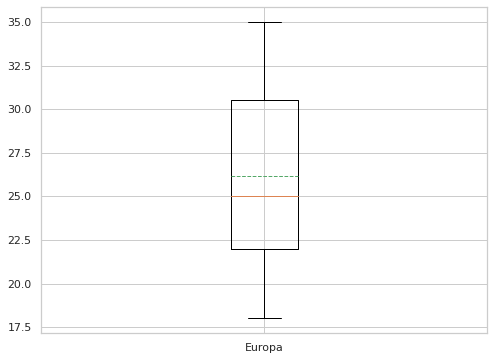

In [12]:
plt.boxplot(eur, vert=True, showmeans=True, meanline=True, labels=['Europa'])
plt.savefig("1-Eur.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


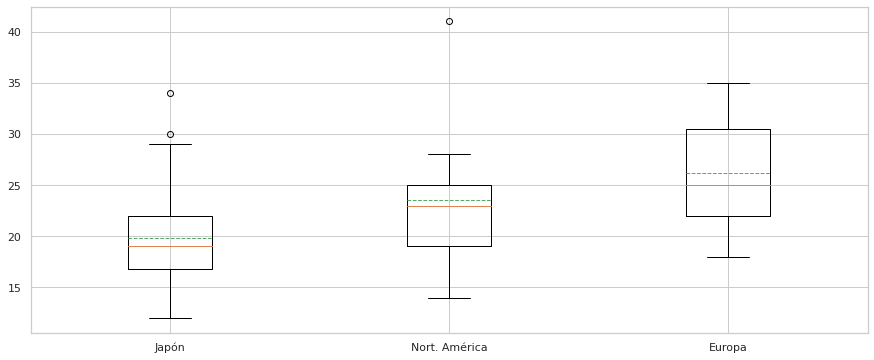

In [13]:
plt.figure(figsize=(15, 6))
plt.boxplot([jap, ame, eur], vert=True, showmeans=True, meanline=True)

plt.xticks([1, 2, 3], ['Japón', 'Nort. América', 'Europa'])
plt.savefig("1-all.pdf", format="pdf", bbox_inches="tight")

## Ejercicio 2

- Producir un diagrama de cajas pára los dos grupos: billetes genuinos y billetes falsos usondo la componente $X_1$ de $\mathbb{X}$.
- Calcular las estadíticas M,Fu, $F_L$ $b_u, b_2, x_*$ y $x^*$ para los dos grupos usendo la componente $X_6$.
- Comentar y comparar los dos análisis: Las cajas para $x_1$ y las cajos para $x_6$

Vamos a hacer la lectura de los datos:

In [14]:
billetes = pd.read_csv('/content/drive/MyDrive/Universidad/Ciencia de Datos/7mo Semestre/2023_1-Analisis_Multivariado/Ejercicios/E1/SwissBank 1.txt', sep="\t",header=None)

In [15]:
billetes

,0,1,2,3,4,5
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


Vamos a hacer una división de los conjuntos, de acuerdo a la descripción del problema en el libro, los primero 100 registros del conjunto de datos corrresponden a los billetes genuinos, y los otros 100 registros son de billetes falsos.

In [16]:
billetes_v = billetes[0:100]
billetes_f = billetes[100:200]

La variable X1 es la que mide el largo del billete, para cada subconjunto de billetes vamos a hacer la selección y vamos a gráficar las gráficas de cajas.

In [17]:
# X1 = Largo del billete.
x1_v = billetes_v[0]
x1_f = billetes_f[0]

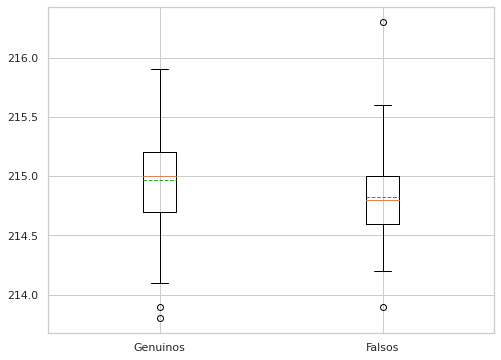

In [18]:
plt.boxplot([x1_v, x1_f], vert=True, showmeans=True, meanline=True, meanprops={'color': 'tab:green'})
plt.xticks([1, 2], ['Genuinos', 'Falsos'])
plt.savefig("2-x1.pdf", format="pdf", bbox_inches="tight")

Vamos a extraer la componenete X6, que mide la longitud de la Diagonal, y con la función antes definida vamos a obtener las estadisticas. Para fines de exploración vamos a gráficar las cajas para cada conjunto.

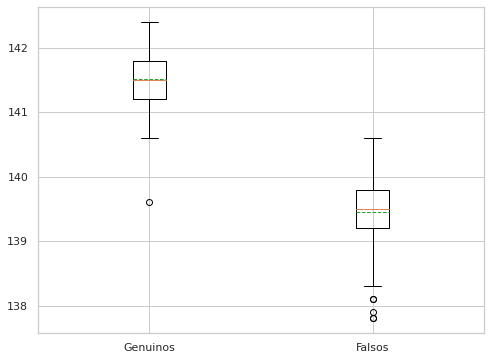

In [19]:
# X1 = Diagonal del billete
x6_v = billetes_v[5]
x6_f = billetes_f[5]

plt.boxplot ([x6_v, x6_f], vert=True, showmeans=True, meanline=True, meanprops={'color': 'tab:green'})
plt.xticks([1, 2], ['Genuinos', 'Falsos'])
plt.savefig("2-x6.pdf", format="pdf", bbox_inches="tight")

In [20]:
est_box(x6_v)

Estadisticas:
---------------------
 x_max: 140.9
 x_min: 142.2
 M: 141.5
 F_L: 141.7
 F_U: 141.4
 bl: 142.14999999999998
 bu: 140.95000000000005
 mean: 141.51700000000002


In [21]:
est_box(x6_f)

Estadisticas:
---------------------
 x_max: 138.6
 x_min: 140.6
 M: 139.5
 F_L: 139.8
 F_U: 139.35000000000002
 bl: 140.475
 bu: 138.67500000000004
 mean: 139.45


# Ejercicio 3

Haga un resumen respecto a como foncionan los histogramas y las estimaciones de la densidad para mos datos. Explique con cuidado qué es lo que los paquetes dibujan y describa un ejemplo con datos.

In [22]:
datos = np.random.normal(1.60, 0.2, 50)

In [23]:
datos

array([1.6916736 , 1.6271499 , 1.47974147, 1.47879345, 1.69239924,
       2.12905905, 1.08101752, 1.70052984, 1.62328256, 1.86620012,
       1.43085026, 1.23991665, 1.43771453, 1.78796002, 1.6681953 ,
       1.55087009, 1.6792272 , 1.43574124, 1.19451313, 1.26493015,
       2.30469552, 1.51774583, 1.68679034, 1.33852416, 1.88013462,
       1.35022992, 1.56511657, 1.79711511, 1.36601834, 1.46980876,
       1.42664279, 1.83261844, 1.36314677, 1.87578272, 1.64174051,
       1.88090284, 1.81586954, 2.07402966, 1.69613775, 1.61827369,
       1.74008582, 1.53850569, 1.7404805 , 1.7162829 , 1.55288209,
       1.78242568, 1.70658963, 1.94528541, 1.98418505, 1.59885702])

In [24]:
max(datos)

2.3046955238466467

In [25]:
min(datos)

1.0810175197117777

In [26]:
max(datos) - min(datos)

1.223678004134869

In [27]:
np.sqrt(50)

7.0710678118654755

In [28]:
(max(datos) - min(datos))/7

0.1748111434478384

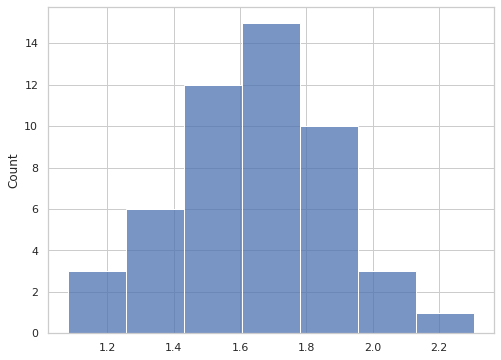

In [29]:
sns.histplot(data=datos, bins = 7)
plt.savefig("3-hist.pdf", format="pdf", bbox_inches="tight")

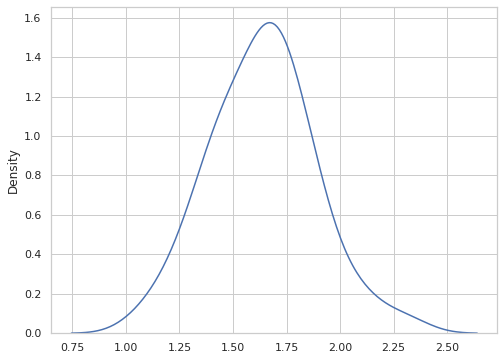

In [54]:
sns.kdeplot(data=datos)
plt.savefig("3-den.pdf", format="pdf", bbox_inches="tight")

# Ejercicio 4

Ejercicio: Calcular de nuevo las componentes pero usando un reescalamiento de los datos $\widetilde{X}$. Por ejerplo si se asume que las variables $x_1, x_2, x_3$ y $x_6$ foeron medidas en cms. Y que $X_4 y_5 X_5$ se quedam cano estaban originalmente, o sed en escala de $\mathrm{mm}$., esto serid equivalente a re-escalar $\widetilde{x}_1=\frac{x_1}{10} ; \widetilde{x}_2=\frac{x_2}{10}; \widetilde{x}_3=\frac{x_3}{10} y$
$\widetilde{x_6}=\frac{x_6}{10}$ y use le matriz de datos $\tilde{\chi}$.

compare sus resoltados con la Figura $C$ Cobtenida al calcular las componentes principcles usdndo los datos origindes sin ningún re-escalamiento), ¿Qué se observa?



In [31]:
billetes = pd.read_csv('/content/drive/MyDrive/Universidad/Ciencia de Datos/7mo Semestre/2023_1-Analisis_Multivariado/Ejercicios/E1/SwissBank 1.txt', sep="\t",header=None)

In [32]:
billetes_norm = billetes.copy()
billetes_norm[0] = billetes[0]/10
billetes_norm[1] = billetes[1]/10
billetes_norm[2] = billetes[2]/10
billetes_norm[5] = billetes[5]/10

billetes_norm

,0,1,2,3,4,5
0,21.48,13.10,13.11,9.0,9.7,14.10
1,21.46,12.97,12.97,8.1,9.5,14.17
2,21.48,12.97,12.97,8.7,9.6,14.22
3,21.48,12.97,12.96,7.5,10.4,14.20
4,21.50,12.96,12.97,10.4,7.7,14.18
...,...,...,...,...,...,...
195,21.50,13.04,13.03,9.9,12.1,13.96
196,21.51,13.03,12.99,10.3,11.5,13.97
197,21.48,13.03,13.04,10.6,11.1,14.00
198,21.47,13.07,13.08,11.2,11.2,13.94


Calculo de componenetes:

$$\bar{x}_{(n)}=\frac{1}{n} \chi^{\prime} \mathbb{I}_n$$

In [33]:
mean_vector = np.array([billetes_norm.mean(axis=0).values]).T

In [34]:
mean_vector

array([[21.4896 ],
       [13.01215],
       [12.99565],
       [ 9.4175 ],
       [10.6505 ],
       [14.04835]])

$$
\hat{\sum} = \frac{1}{n} \chi^{\prime} \chi-\bar{x}_{(n)} \bar{x}_{(n)}^{\prime}
$$

In [35]:
sigma = 1/len(billetes_norm) * (np.dot(billetes_norm.T, billetes_norm)) - np.dot(mean_vector, mean_vector.T)
sigma

array([[ 1.41084000e-03,  3.12860000e-04,  2.29760000e-04,
        -1.02730000e-02, -1.84480000e-03,  8.38840000e-04],
       [ 3.12860000e-04,  1.29687750e-03,  1.07885250e-03,
         2.14723750e-02,  1.04514250e-02, -2.08295250e-03],
       [ 2.29760000e-04,  1.07885250e-03,  1.62457750e-03,
         2.82711250e-02,  1.29346750e-02, -2.39267750e-03],
       [-1.02730000e-02,  2.14723750e-02,  2.82711250e-02,
         2.07644375e+00,  1.63716250e-01, -1.03181125e-01],
       [-1.84480000e-03,  1.04514250e-02,  1.29346750e-02,
         1.63716250e-01,  6.41499750e-01, -5.46866750e-02],
       [ 8.38840000e-04, -2.08295250e-03, -2.39267750e-03,
        -1.03181125e-01, -5.46866750e-02,  1.32107775e-02]])

Valores y vectores propios:

In [36]:
eigenvalue, featurevector = np.linalg.eig(sigma)
print('-----------------')
print('- Eigenvectores -')
print(featurevector)
print('-----------------')
print('- Eigenvalores -')
print(eigenvalue)

-----------------
- Eigenvectores -
[[ 0.00497046  0.00107751 -0.05418413 -0.63246848  0.76618635 -0.09990154]
 [-0.01076604 -0.01279284  0.1003698  -0.53519984 -0.33433467  0.76904343]
 [-0.0141202  -0.01549116  0.06292408 -0.55694575 -0.53730721 -0.62985205]
 [-0.99201366  0.11721303 -0.04532457  0.00626558  0.00850268  0.00203464]
 [-0.11341454 -0.99052089 -0.07622973  0.01176364  0.00684572  0.00304692]
 [ 0.05201975  0.06873623 -0.98750456 -0.05637865 -0.11117826  0.04318407]]
-----------------
- Eigenvalores -
[2.10125862e+00 6.26260639e-01 4.66366188e-03 2.08876626e-03
 8.60987547e-04 3.53901192e-04]


In [37]:
# Multiplicación de los datos por los eigenvectores:
billetes_norm = billetes @ featurevector

In [38]:
billetes_norm

,0,1,2,3,4,5
0,-4.887314,-2.336632,-130.626452,-286.759887,34.804803,2.849057
1,-3.902635,-2.157801,-131.469405,-285.205366,35.751585,2.778862
2,-4.482181,-2.151942,-132.008812,-285.355114,35.855019,2.782000
3,-3.391488,-3.097212,-131.824198,-285.286251,35.926259,2.836344
4,-5.971854,-0.096690,-131.566899,-285.417235,36.087609,2.665511
...,...,...,...,...,...,...
195,-6.106399,-4.684337,-129.589087,-286.006902,35.768219,2.820219
196,-6.422732,-4.028682,-129.700855,-285.804041,36.081370,2.988569
197,-6.667916,-3.584758,-129.932494,-285.912513,35.549319,2.715961
198,-7.316129,-3.666145,-129.304073,-286.247361,35.196537,2.757242


Vamos a generar la clasificación:

In [39]:
billetes_norm['tipo'] = 'Verdadero'
billetes_norm['tipo'][100:] = 'Falso'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


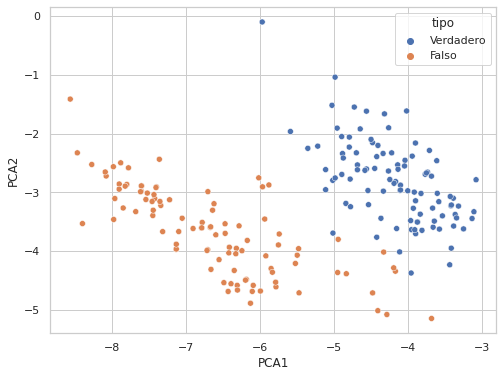

In [40]:
fig = sns.scatterplot(data = billetes_norm, x = 0, y = 1, hue = "tipo")
fig.set(xlabel='PCA1', ylabel='PCA2')
plt.savefig("4-1.pdf", format="pdf", bbox_inches="tight")

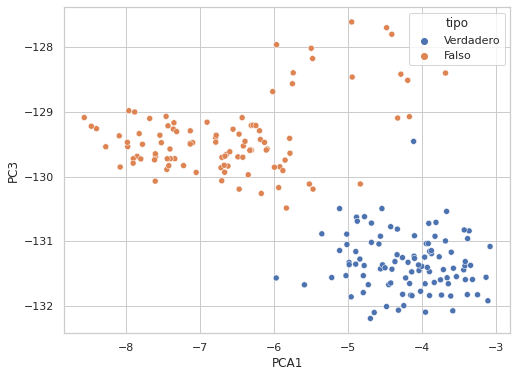

In [41]:
fig = sns.scatterplot(data = billetes_norm, x = 0, y = 2, hue = "tipo")
fig.set(xlabel='PCA1', ylabel='PC3')
plt.savefig("4-2.pdf", format="pdf", bbox_inches="tight")

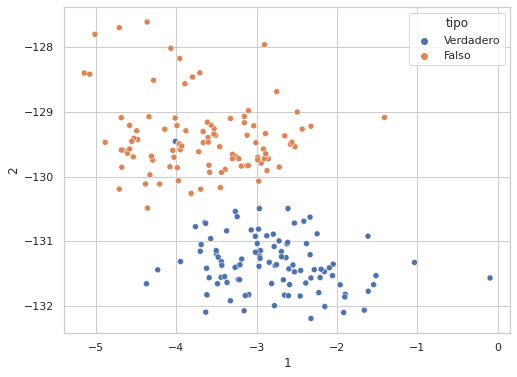

In [42]:
sns.scatterplot(data = billetes_norm, x = 1, y = 2, hue = "tipo")
fig.set(xlabel='PCA2', ylabel='PCA3')
plt.savefig("4-3.pdf", format="pdf", bbox_inches="tight")

## Ejercicio 7



In [43]:
cars = pd.read_csv('/content/drive/MyDrive/Universidad/Ciencia de Datos/7mo Semestre/2023_1-Analisis_Multivariado/Ejercicios/E1/cars.csv', sep=",",header=None)
cars 

,0,1,2,3,4,5,6,7,8
0,A100,3.9,2.8,2.2,4.2,3.0,3.1,2.4,2.8
1,BMW3,4.8,1.6,1.9,5.0,2.0,2.5,1.6,2.8
2,CiAX,3.0,3.8,3.8,2.7,4.0,4.4,4.0,2.6
3,Ferr,5.3,2.9,2.2,5.9,1.7,1.1,3.3,4.3
4,FiUn,2.1,3.9,4.0,2.6,4.5,4.4,4.4,2.2
5,FoFi,2.3,3.1,3.4,2.6,3.2,3.3,3.6,2.8
6,Hyun,2.5,3.4,3.2,2.2,3.3,3.3,3.3,2.4
7,Jagu,4.6,2.4,1.6,5.5,1.3,1.6,2.8,3.6
8,Lada,3.2,3.9,4.3,2.0,4.3,4.5,4.7,2.9
9,Mazd,2.6,3.3,3.7,2.8,3.7,3.0,3.7,3.1


In [44]:
cars_ = cars.set_index(0).reset_index(drop = True)

In [45]:
cars_

,1,2,3,4,5,6,7,8
0,3.9,2.8,2.2,4.2,3.0,3.1,2.4,2.8
1,4.8,1.6,1.9,5.0,2.0,2.5,1.6,2.8
2,3.0,3.8,3.8,2.7,4.0,4.4,4.0,2.6
3,5.3,2.9,2.2,5.9,1.7,1.1,3.3,4.3
4,2.1,3.9,4.0,2.6,4.5,4.4,4.4,2.2
5,2.3,3.1,3.4,2.6,3.2,3.3,3.6,2.8
6,2.5,3.4,3.2,2.2,3.3,3.3,3.3,2.4
7,4.6,2.4,1.6,5.5,1.3,1.6,2.8,3.6
8,3.2,3.9,4.3,2.0,4.3,4.5,4.7,2.9
9,2.6,3.3,3.7,2.8,3.7,3.0,3.7,3.1


In [46]:
mean_vector = np.array([cars_.mean(axis=0).values]).T

In [47]:
sigma = 1/len(cars_) * (np.dot(cars_.T, cars_)) - np.dot(mean_vector, mean_vector.T)
sigma

array([[ 0.71383743, -0.22381853, -0.40302457,  0.74455577, -0.43434783,
        -0.40378072, -0.2631569 ,  0.27162571],
       [-0.22381853,  0.62672968,  0.78204159, -0.67797732,  0.49869565,
         0.54646503,  0.81470699,  0.12992439],
       [-0.40302457,  0.78204159,  1.13379962, -1.06124764,  0.73304348,
         0.85659735,  1.07111531,  0.10589792],
       [ 0.74455577, -0.67797732, -1.06124764,  1.35062382, -0.85695652,
        -0.99829868, -0.91077505,  0.173138  ],
       [-0.43434783,  0.49869565,  0.73304348, -0.85695652,  0.69043478,
         0.73652174,  0.64956522, -0.09956522],
       [-0.40378072,  0.54646503,  0.85659735, -0.99829868,  0.73652174,
         1.00748582,  0.72476371, -0.13914934],
       [-0.2631569 ,  0.81470699,  1.07111531, -0.91077505,  0.64956522,
         0.72476371,  1.20461248,  0.21069943],
       [ 0.27162571,  0.12992439,  0.10589792,  0.173138  , -0.09956522,
        -0.13914934,  0.21069943,  0.30461248]])

In [48]:
eigenvalue, featurevector = np.linalg.eig(sigma)
print('-----------------')
print('- Eigenvectores -')
print(featurevector)
print('-----------------')
print('- Eigenvalores -')
print(eigenvalue)

-----------------
- Eigenvectores -
[[ 0.22074468 -0.54061277 -0.59342593  0.10914002  0.24562552  0.43602713
  -0.20763442  0.03715014]
 [-0.30597795 -0.27903839  0.12849793 -0.27408282 -0.15349251  0.47623487
   0.68916894 -0.10755712]
 [-0.44346793 -0.21912515  0.06175501  0.32925148  0.61334679 -0.30152838
   0.11586052 -0.40319081]
 [ 0.47767627 -0.29648061 -0.1164241  -0.4561908   0.14116104 -0.56452099
   0.35123799 -0.01677775]
 [-0.33268483  0.13869582 -0.20025752 -0.7204073   0.0730782   0.04250816
  -0.41112108 -0.36718744]
 [-0.38569859  0.15577559 -0.71265406  0.14605793 -0.34651607 -0.31721979
   0.24515026  0.1302359 ]
 [-0.41623018 -0.45655877  0.2155418  -0.170154   -0.00227424 -0.19039136
  -0.24198398  0.66939195]
 [ 0.01098606 -0.49194548  0.13974456  0.16485905 -0.62814683 -0.18652925
  -0.23972254 -0.47363848]]
-----------------
- Eigenvalores -
[5.31474182 1.09599529 0.35045417 0.09516431 0.02341941 0.03423837
 0.04573816 0.07238458]


In [49]:
# Multiplicación de los datos por los eigenvectores:
cars_pca = cars_ @ featurevector
cars_pca

,0,1,2,3,4,5,6,7
0,-2.127135,-6.191188,-4.209102,-3.188640,-0.148835,-1.835465,1.124609,-1.531239
1,-0.149021,-6.381254,-4.553632,-2.456347,0.321995,-2.075544,0.814586,-1.507668
2,-5.560104,-6.180455,-4.082867,-3.185611,-0.009179,-2.024517,1.227514,-1.324296
3,-0.190881,-9.120643,-3.135722,-3.100213,0.073429,-2.009057,0.966730,-1.409640
4,-6.263063,-5.652482,-3.581750,-3.693985,0.149850,-2.353462,1.264885,-1.173828
5,-4.511716,-5.687476,-2.884619,-2.639537,-0.135141,-2.132251,0.917052,-1.324051
6,-4.574531,-5.369278,-3.071122,-2.670246,-0.051949,-1.480081,1.045981,-1.309619
7,0.023247,-7.757577,-3.256873,-2.723777,-0.207885,-2.095515,1.133300,-0.924397
8,-6.529101,-6.628496,-4.014868,-2.978398,0.029693,-1.853489,0.726840,-1.288122
9,-4.633153,-6.201126,-2.864560,-3.025653,0.071906,-2.068136,0.722380,-1.756547


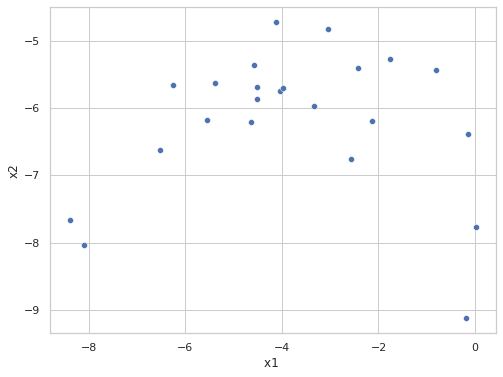

In [50]:
fig = sns.scatterplot(data = cars_pca, x = 0, y = 1)
fig.set(xlabel='x1 ', ylabel='x2')
plt.savefig("7-1.pdf", format="pdf", bbox_inches="tight")

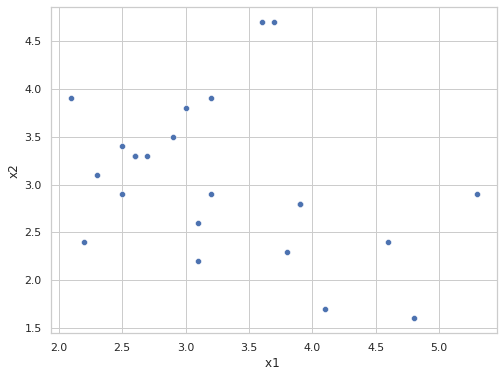

In [51]:
fig = sns.scatterplot(data = cars_, x = 1, y = 2)
fig.set(xlabel='x1 ', ylabel='x2')
plt.savefig("7-2.pdf", format="pdf", bbox_inches="tight")

In [52]:
sum(eigenvalue[:2])/sum(eigenvalue)

0.9116343896806853

In [53]:
sum(eigenvalue[:3])/sum(eigenvalue)

0.9614704799055422